<a href="https://colab.research.google.com/drive/1qrp_WyQwxA_V56HtEdsJg4S-C8ylYnxH?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

The Jupyter notebook you've provided contains code for performing K-Means clustering on the California housing dataset. I will now create documentation for each code cell in the notebook. This documentation will help explain what each part of the code does, which you can then add to your notebook as cell text.

In [ ]:
import pandas as pd

**Dataset Used:**

California Housing Prices:

https://www.kaggle.com/datasets/camnugent/california-housing-prices/

In [ ]:
file_path = "/content/drive/MyDrive/Datasets/housing.csv"
data = pd.read_csv(file_path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

This cell checks for missing values in the dataset. The method isnull() is applied to the DataFrame data, which returns a DataFrame where each cell is either True (if the original cell was null/missing) or False. The .sum() method is then used to sum these True values column-wise. The output shows the count of missing values in each column. Identifying missing values is a critical step in data preprocessing, as it informs decisions about how to handle these gaps in the dataset, such as imputing missing values or dropping incomplete rows.

In [ ]:
# Filling missing values in 'total_bedrooms' with the median
median_total_bedrooms = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Verify if missing values are filled
missing_values_after_filling = data.isnull().sum()
missing_values_after_filling

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

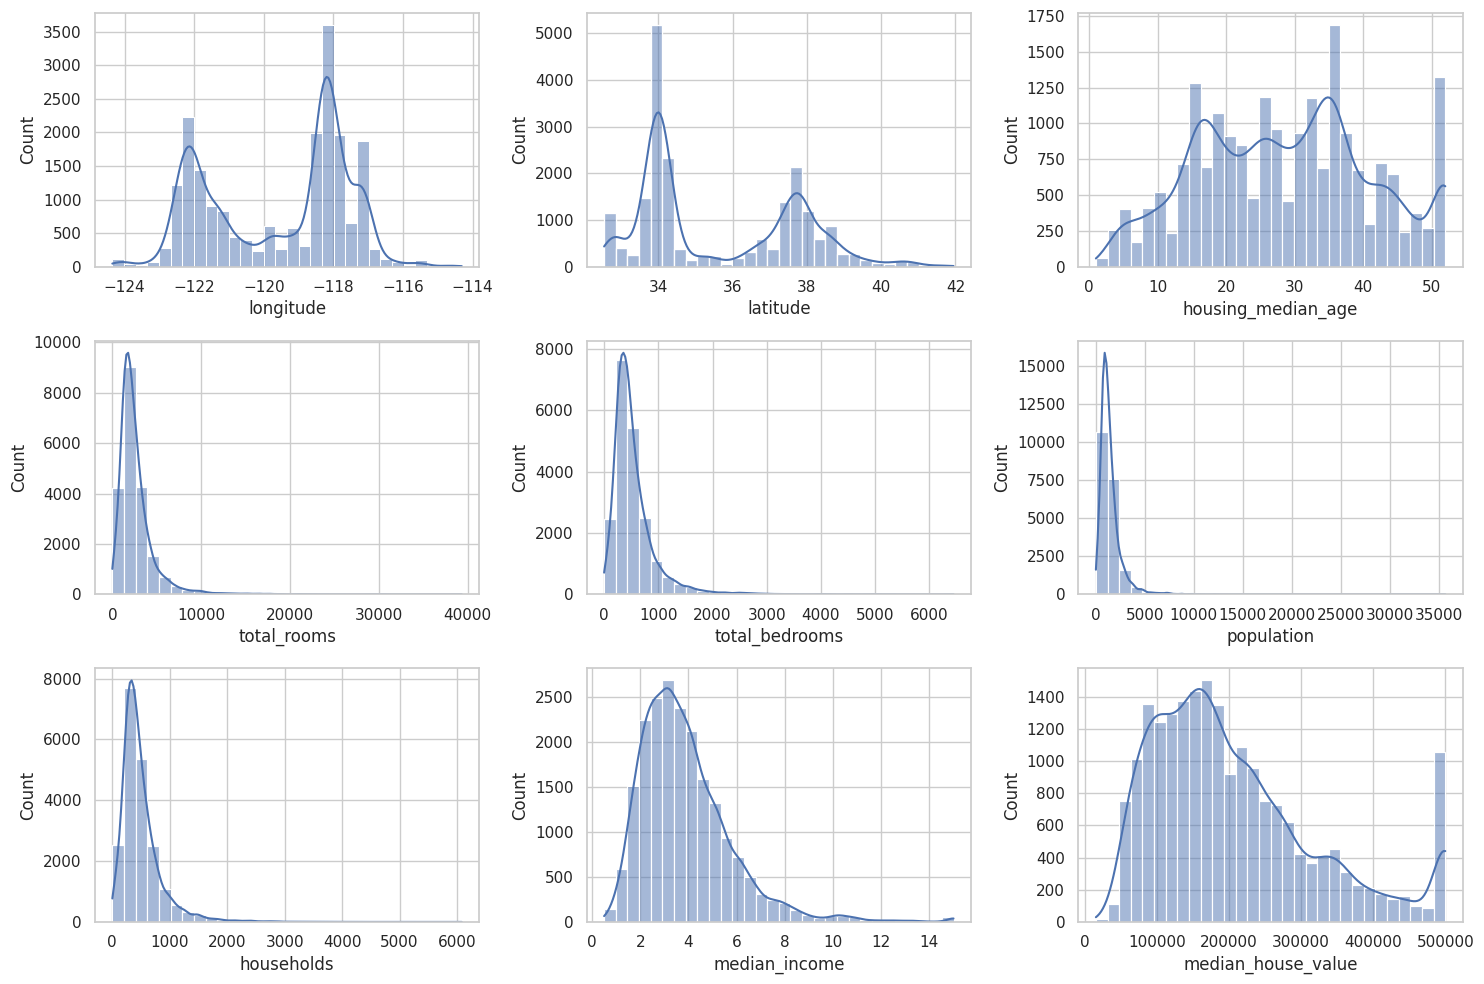

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.tight_layout()

plt.show()

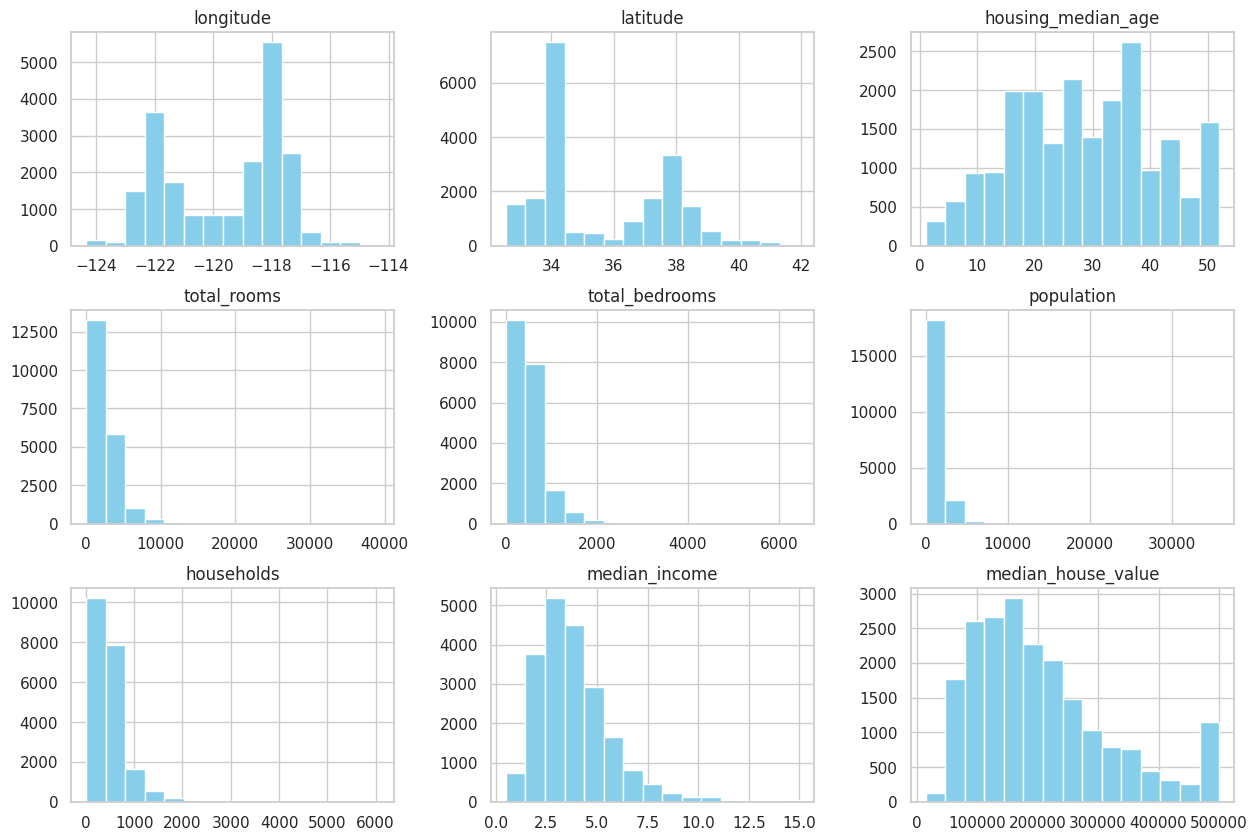

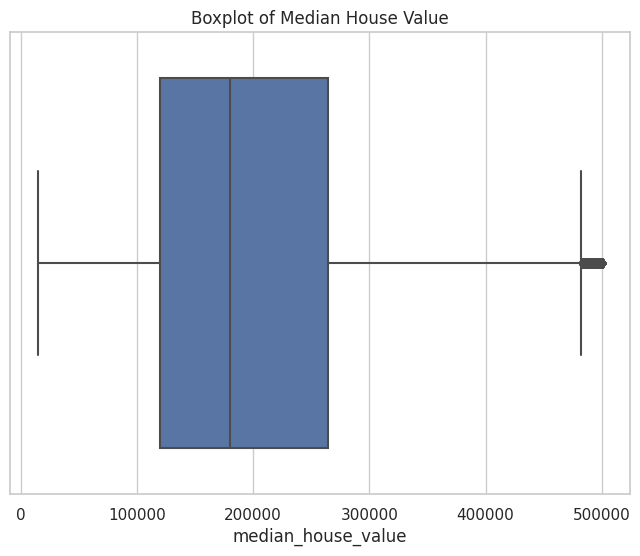

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for plots
sns.set(style="whitegrid")

# Histograms for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue')

# Boxplot for the target variable 'median_house_value'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['median_house_value'])
plt.title('Boxplot of Median House Value')

plt.show()


<ipython-input-60-fc01e3c967b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


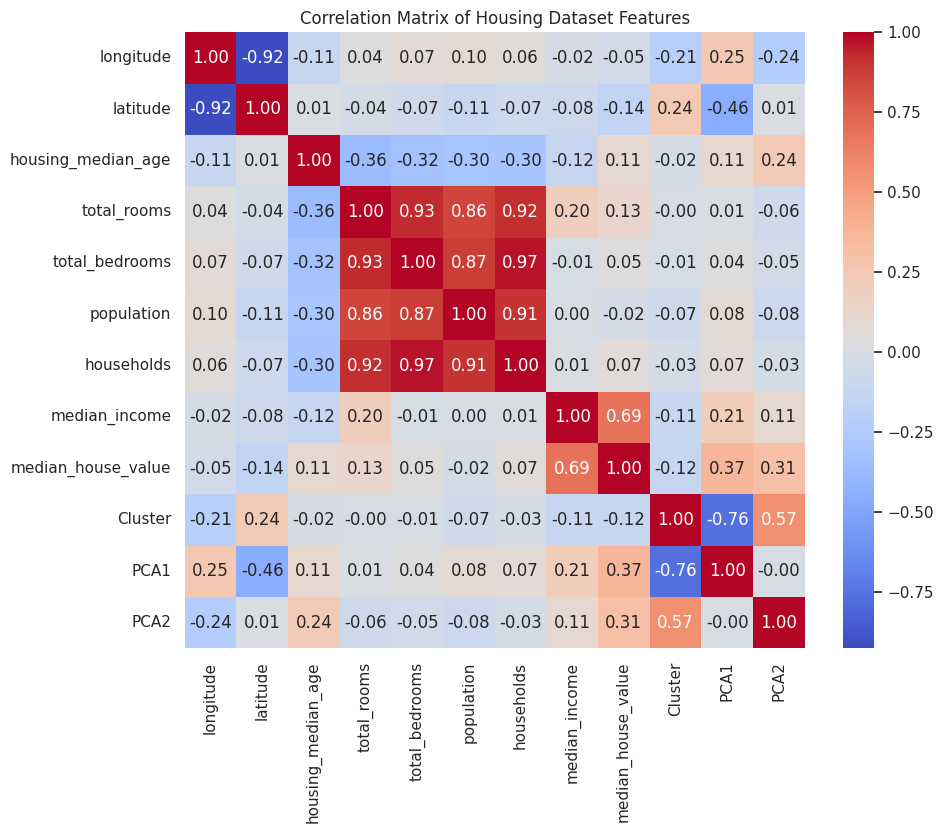

median_house_value    1.000000
median_income         0.688075
PCA1                  0.370228
PCA2                  0.313316
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
Cluster              -0.116251
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
# Correlation Matrix
correlation_matrix = data.corr()

# Heatmap of the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Housing Dataset Features")
plt.show()

correlation_matrix['median_house_value'].sort_values(ascending=False)

In [ ]:
# Creating new features
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Display the first few rows with the new features
data[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head()

,rooms_per_household,bedrooms_per_room,population_per_household
0,6.984127,0.146591,2.555556
1,6.238137,0.155797,2.109842
2,8.288136,0.129516,2.802260
3,5.817352,0.184458,2.547945
4,6.281853,0.172096,2.181467


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for standardization
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
                      'households', 'median_income', 'median_house_value', 'rooms_per_household',
                      'bedrooms_per_room', 'population_per_household']

# Standardizing the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows after standardization
data[numerical_features].head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-1.029988,-0.049597
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.888897,-0.092512
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-1.291686,-0.025843
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.449613,-0.050329
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.639087,-0.085616


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

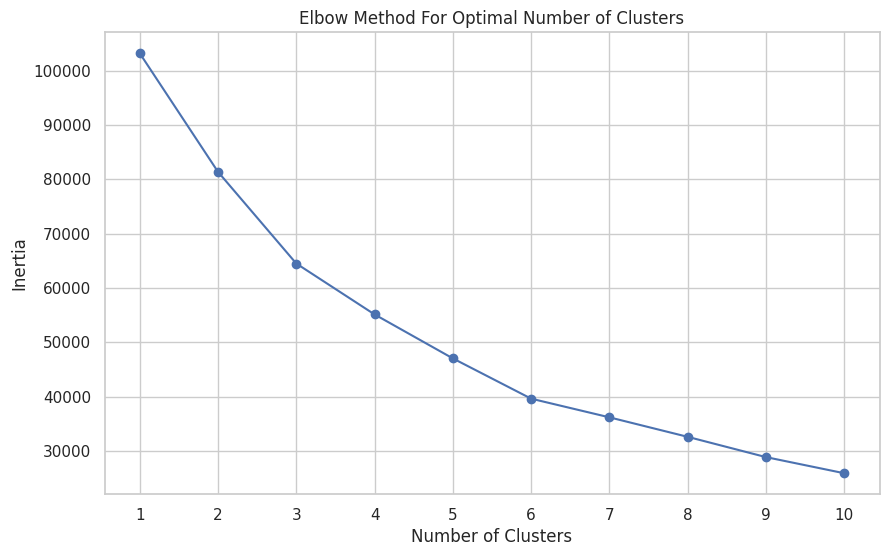

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Selecting the features for clustering
features_for_clustering = ['median_income', 'housing_median_age', 'rooms_per_household',
                           'bedrooms_per_room', 'population_per_household']
clustering_data = data[features_for_clustering]

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

The final cell in the notebook uses a line plot to visualize the inertia values computed in the previous cell, a method commonly referred to as the "Elbow Method". The number of clusters (from 1 to 9) is plotted on the X-axis, and the corresponding inertia values are plotted on the Y-axis. The marker='o' parameter adds markers at each point, making the plot easier to read. This plot is useful for identifying the "elbow point" where the rate of decrease in inertia significantly slows down, suggesting a suitable number of clusters for the dataset. The Elbow Method is a heuristic used in cluster analysis to determine the number of clusters in a data set.

In [ ]:
from sklearn.cluster import KMeans

# Selecting features for K-means clustering
features_for_clustering = ['median_income', 'housing_median_age', 'rooms_per_household',
                           'bedrooms_per_room', 'population_per_household']
clustering_data = data[features_for_clustering]

# K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(clustering_data)

# Display the first few rows with the cluster labels
data[['cluster'] + features_for_clustering].head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,median_income,housing_median_age,rooms_per_household,bedrooms_per_room,population_per_household
0,0,2.344766,0.982143,0.628559,-1.029988,-0.049597
1,0,2.332238,-0.607019,0.327041,-0.888897,-0.092512
2,0,1.782699,1.856182,1.155620,-1.291686,-0.025843
3,1,0.932968,1.856182,0.156966,-0.449613,-0.050329
4,1,-0.012881,1.856182,0.344711,-0.639087,-0.085616


In this cell, the K-Means clustering algorithm is applied to the dataset. First, the KMeans class is imported from the sklearn.cluster module, which is part of the scikit-learn library, a powerful tool for machine learning. An instance of KMeans is then created, specifying 3 as the number of clusters (n_clusters) and setting the random_state to 42 for reproducibility. The fit_predict method is called on this instance with the dataset, after dropping rows with missing values using data.dropna(). This method performs the clustering on the dataset and returns an array clusters that contains the cluster index for each sample. This step is essential for dividing the dataset into groups based on similarities in their features.

In [ ]:
# Analyzing the clusters by calculating the mean values of features within each cluster
cluster_analysis = data.groupby('cluster')[features_for_clustering].mean()
cluster_analysis.reset_index()

,cluster,median_income,housing_median_age,rooms_per_household,bedrooms_per_room,population_per_household
0,0,0.819513,-0.485889,0.490575,-0.669612,-0.010982
1,1,-0.543090,0.321524,-0.324926,0.443474,-0.010846
2,2,1.473189,1.088087,0.148127,-0.060971,74.983717


In [ ]:
# Identifying outliers in 'population_per_household' within Cluster 2
cluster_2_data = data[data['cluster'] == 2]

# We'll use a threshold to identify extreme outliers. A common approach is to look for values beyond 3 standard deviations from the mean.
threshold = cluster_2_data['population_per_household'].mean() + 3 * cluster_2_data['population_per_household'].std()
outliers_cluster_2 = cluster_2_data[cluster_2_data['population_per_household'] > threshold]

outliers_cluster_2[['population_per_household'] + features_for_clustering]

,population_per_household,median_income,housing_median_age,rooms_per_household,bedrooms_per_room,population_per_household


In [ ]:
cluster_distribution = data['Cluster'].value_counts()
cluster_characteristics = data.groupby('Cluster').mean()
cluster_distribution, cluster_characteristics

<ipython-input-68-aefab01e771d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_characteristics = data.groupby('Cluster').mean()


(0    9136
 1    8846
 2    2658
 Name: Cluster, dtype: int64,
           longitude   latitude  housing_median_age  total_rooms  \
 Cluster                                                           
 0       -118.847766  34.560577            0.050832    -0.003401   
 1       -120.386568  37.006717           -0.069397     0.010683   
 2       -119.332555  34.738439            0.056238    -0.023865   
 
          total_bedrooms  population  households  median_income  \
 Cluster                                                          
 0              0.020161    0.083726    0.047618       0.189502   
 1             -0.021257   -0.067507   -0.050519      -0.217084   
 2              0.001448   -0.063110    0.004459       0.071121   
 
          median_house_value      PCA1      PCA2  rooms_per_household  \
 Cluster                                                                
 0                  0.287960  1.362291 -0.372707            -0.111726   
 1                 -0.408270 -1.256213 

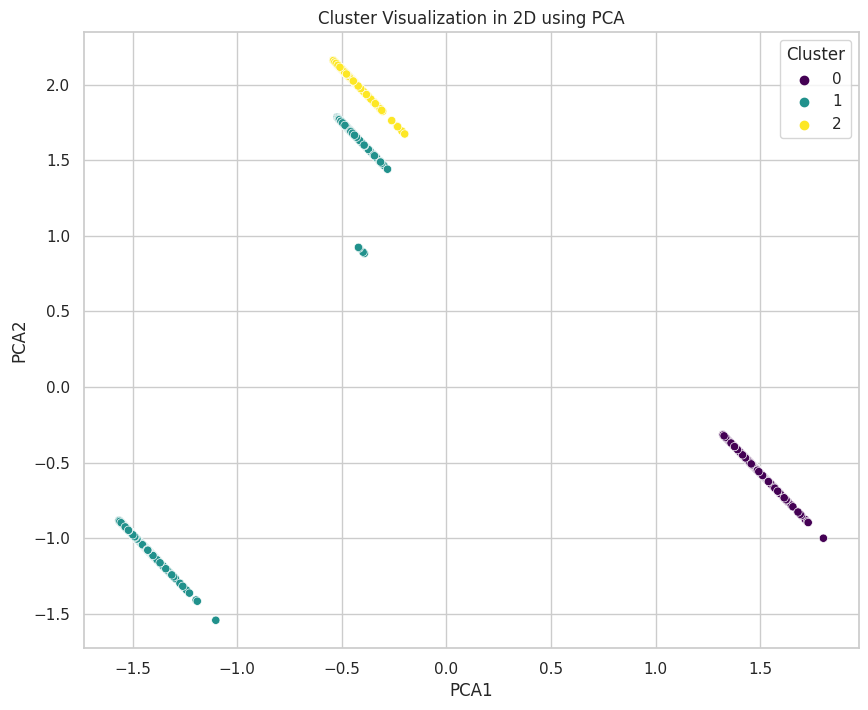

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_processed)

data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Cluster Visualization in 2D using PCA')
plt.show()

In [ ]:
from joblib import dump

# Save the model
dump(kmeans, 'kmeans_model.joblib')

# To load the model in future use:
# from joblib import load
# kmeans = load('kmeans_model.joblib')

['kmeans_model.joblib']